# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240509

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [47]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [48]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [49]:
input = '/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_annotated_muon_ac240727.raw.h5mu'
mdata_data = mu.read_h5mu(input) 
mdata_data

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [50]:
adata = mdata_data.mod["rna"]
adata = adata[adata.obs['model'].isin(["Pkp2"]) , :]
adata

View of AnnData object with n_obs × n_vars = 30280 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [51]:
adata.obs

,cell_source,donor,n_counts,sample,condition,genotype,infection,library,model,n_genes_by_counts,...,G2M_score,_scvi_batch,_scvi_labels,batch,leiden,classification,phenotype,annotation,lineage,general_celltype
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,365.0,...,-0.083225,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,1599.0,...,-0.390143,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3854.0,...,-0.578955,7,6,reference,6,Mono_Cd14+Ly6c+,pro-inflammatory,Mono_Cd14+Ly6c+,myeloid,Monocyte
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3788.0,...,-0.370084,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3493.0,...,-0.357287,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGCGGGTTA-1-A4,AG_Gerull,Pkp2_Ctr_MCMV_5,4524.0,Pkp2_Ctr_MCMV_5,Pkp2_Ctr_MCMV,Pkp2_Ctr,MCMV,A4,Pkp2,1699.0,...,-0.064866,4,29,query,1,Tem/Trm-Cd8+,pro-inflammatory,Tem/Trm-Cd8+,lymphoid,Cd8_T_cell
TTTGATCTCTCGCCTA-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,17569.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,4270.0,...,-0.076327,14,27,query,9,cDC2,pro-inflammatory,cDC2,myeloid,DC
TTTGGAGAGATGCGAC-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,569.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,424.0,...,-0.146335,14,29,query,3,Th1_Cd4+,pro-inflammatory,Th1_Cd4+,lymphoid,Cd4_T_cell
TTTGGAGAGGACGCTA-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,7031.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,2463.0,...,-0.416546,14,21,query,7,Tem_Cd8+,pro-inflammatory,Tem_Cd8+,lymphoid,Cd8_T_cell


In [52]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO'], dtype='object')

In [53]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [54]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV' ]
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [55]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="annotation",
    sample_identifier="sample",
    covariate_obs=["condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 30300 × 29407
  2 modalities
    rna:	30280 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    coda:	20 x 29
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

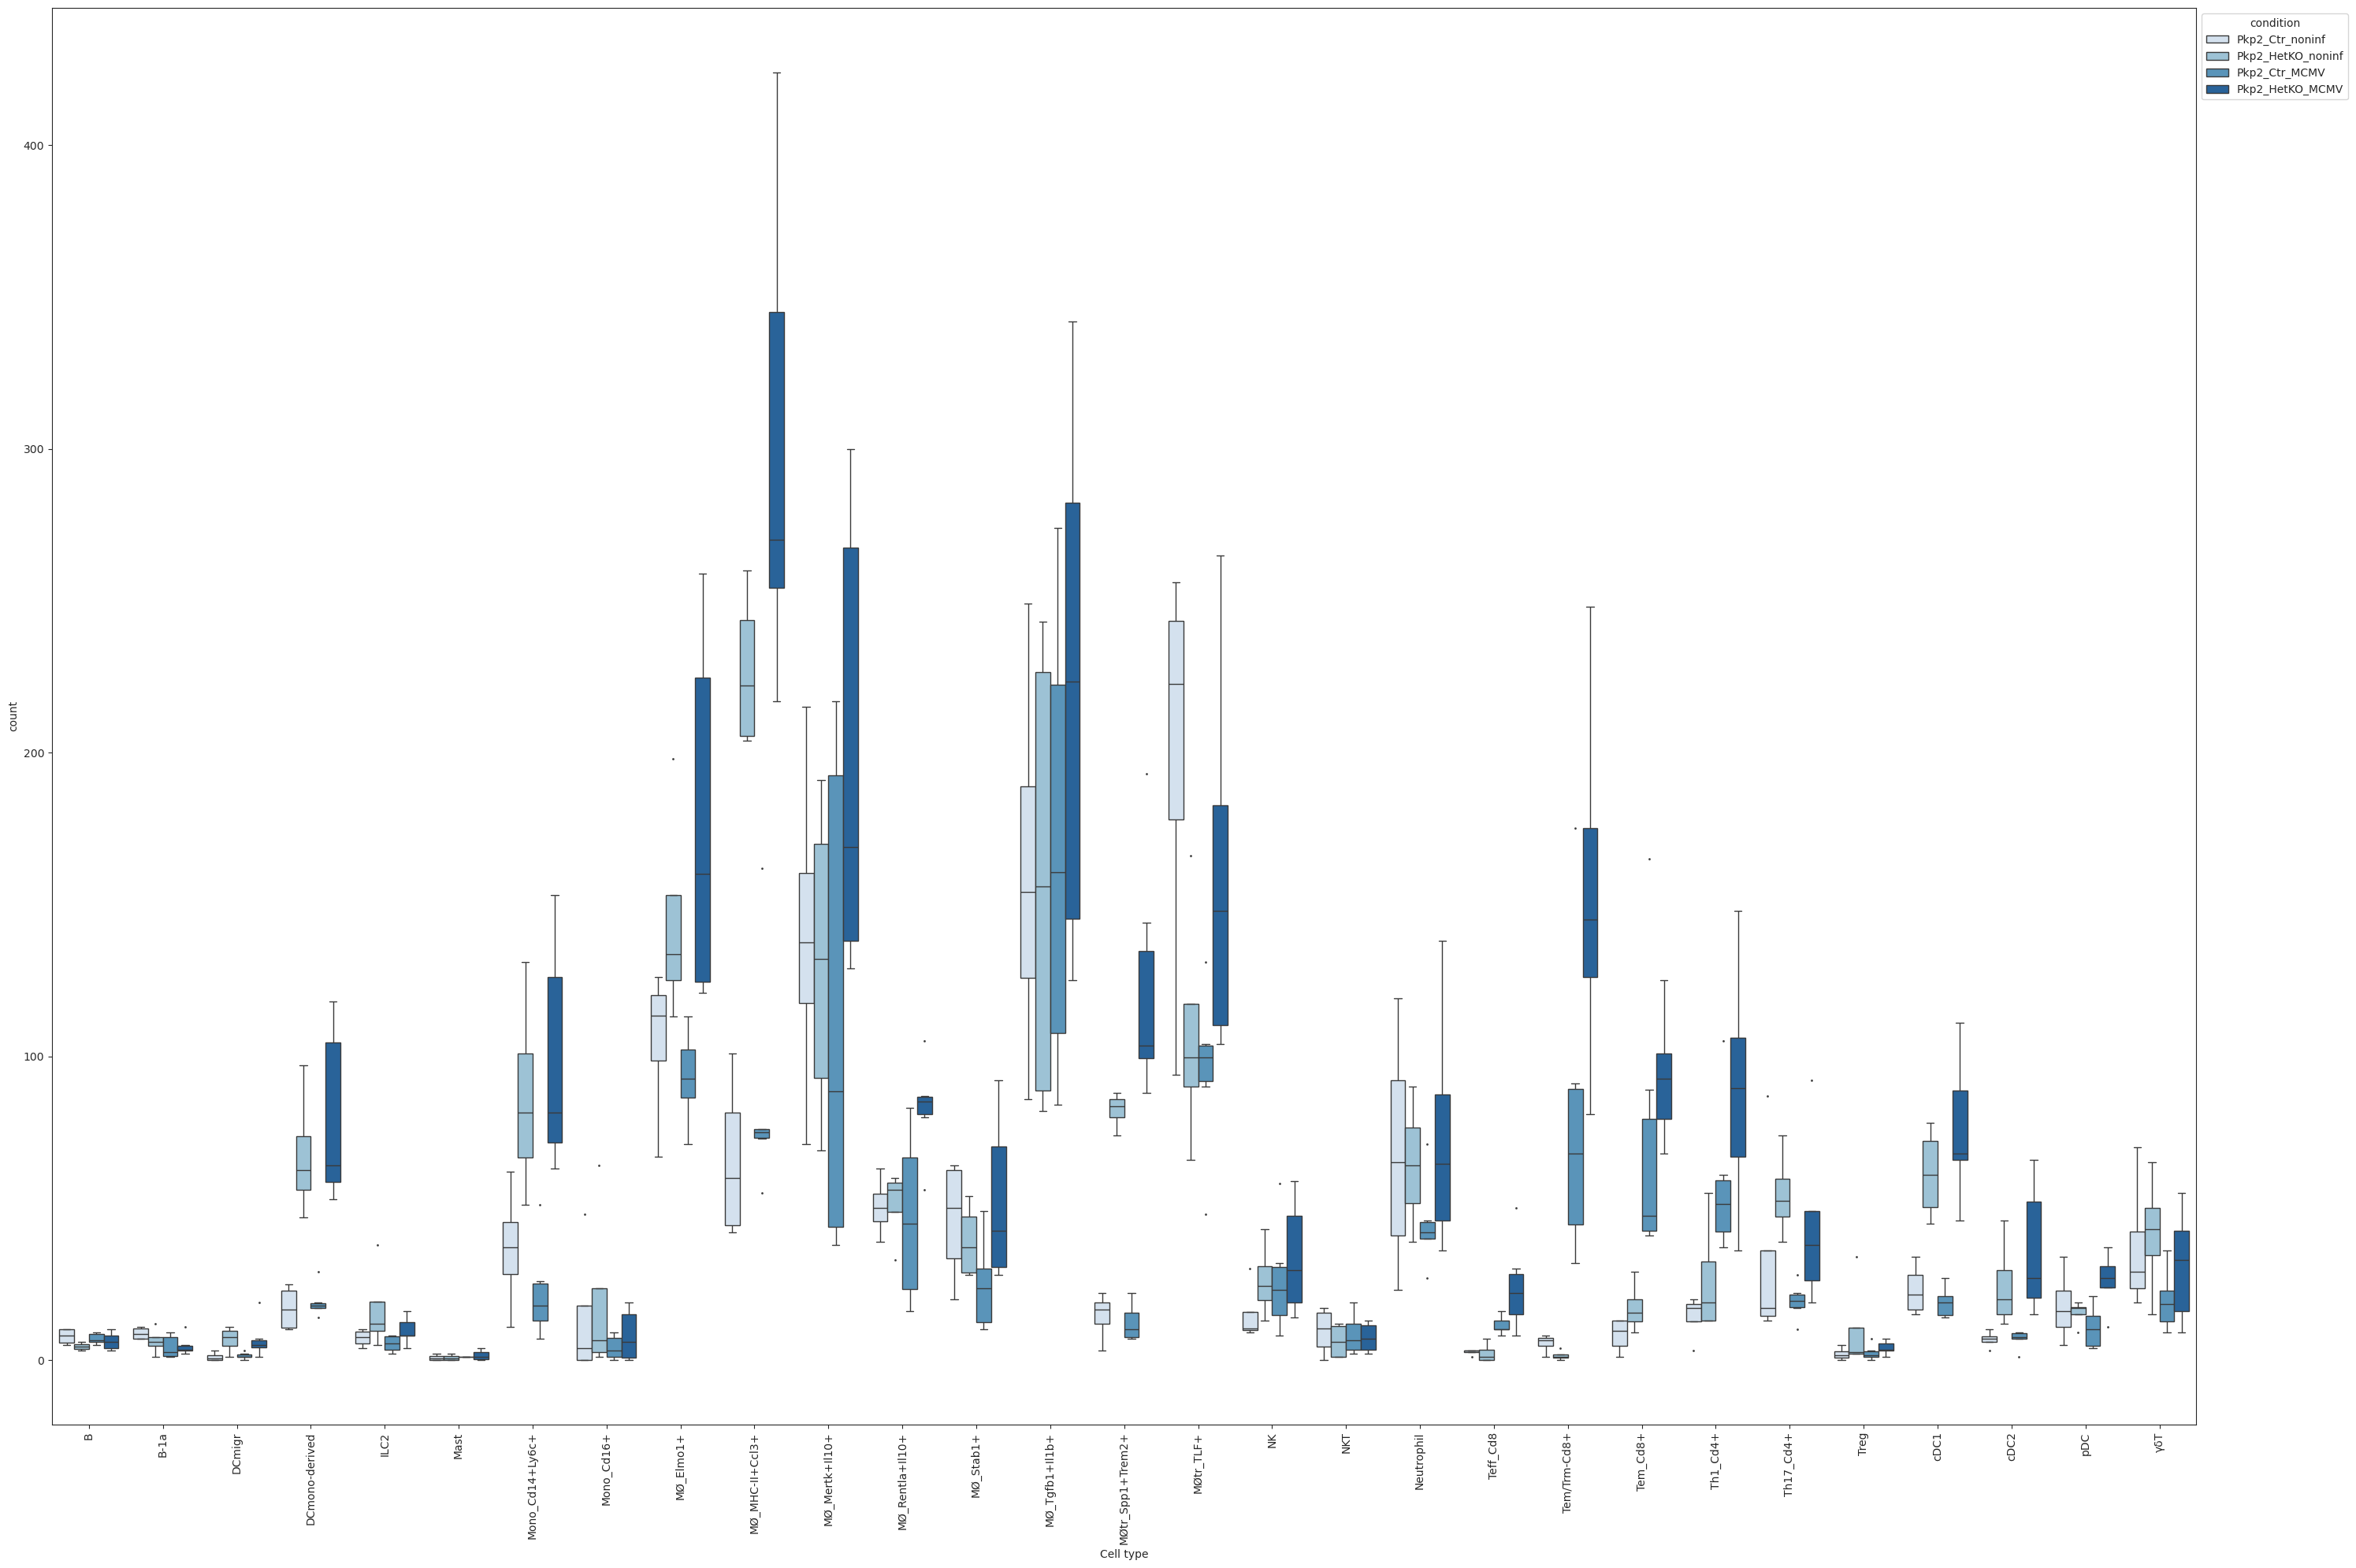

In [56]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_condition_Pkp2_combined_barplot.png", format='png')

plt.show()

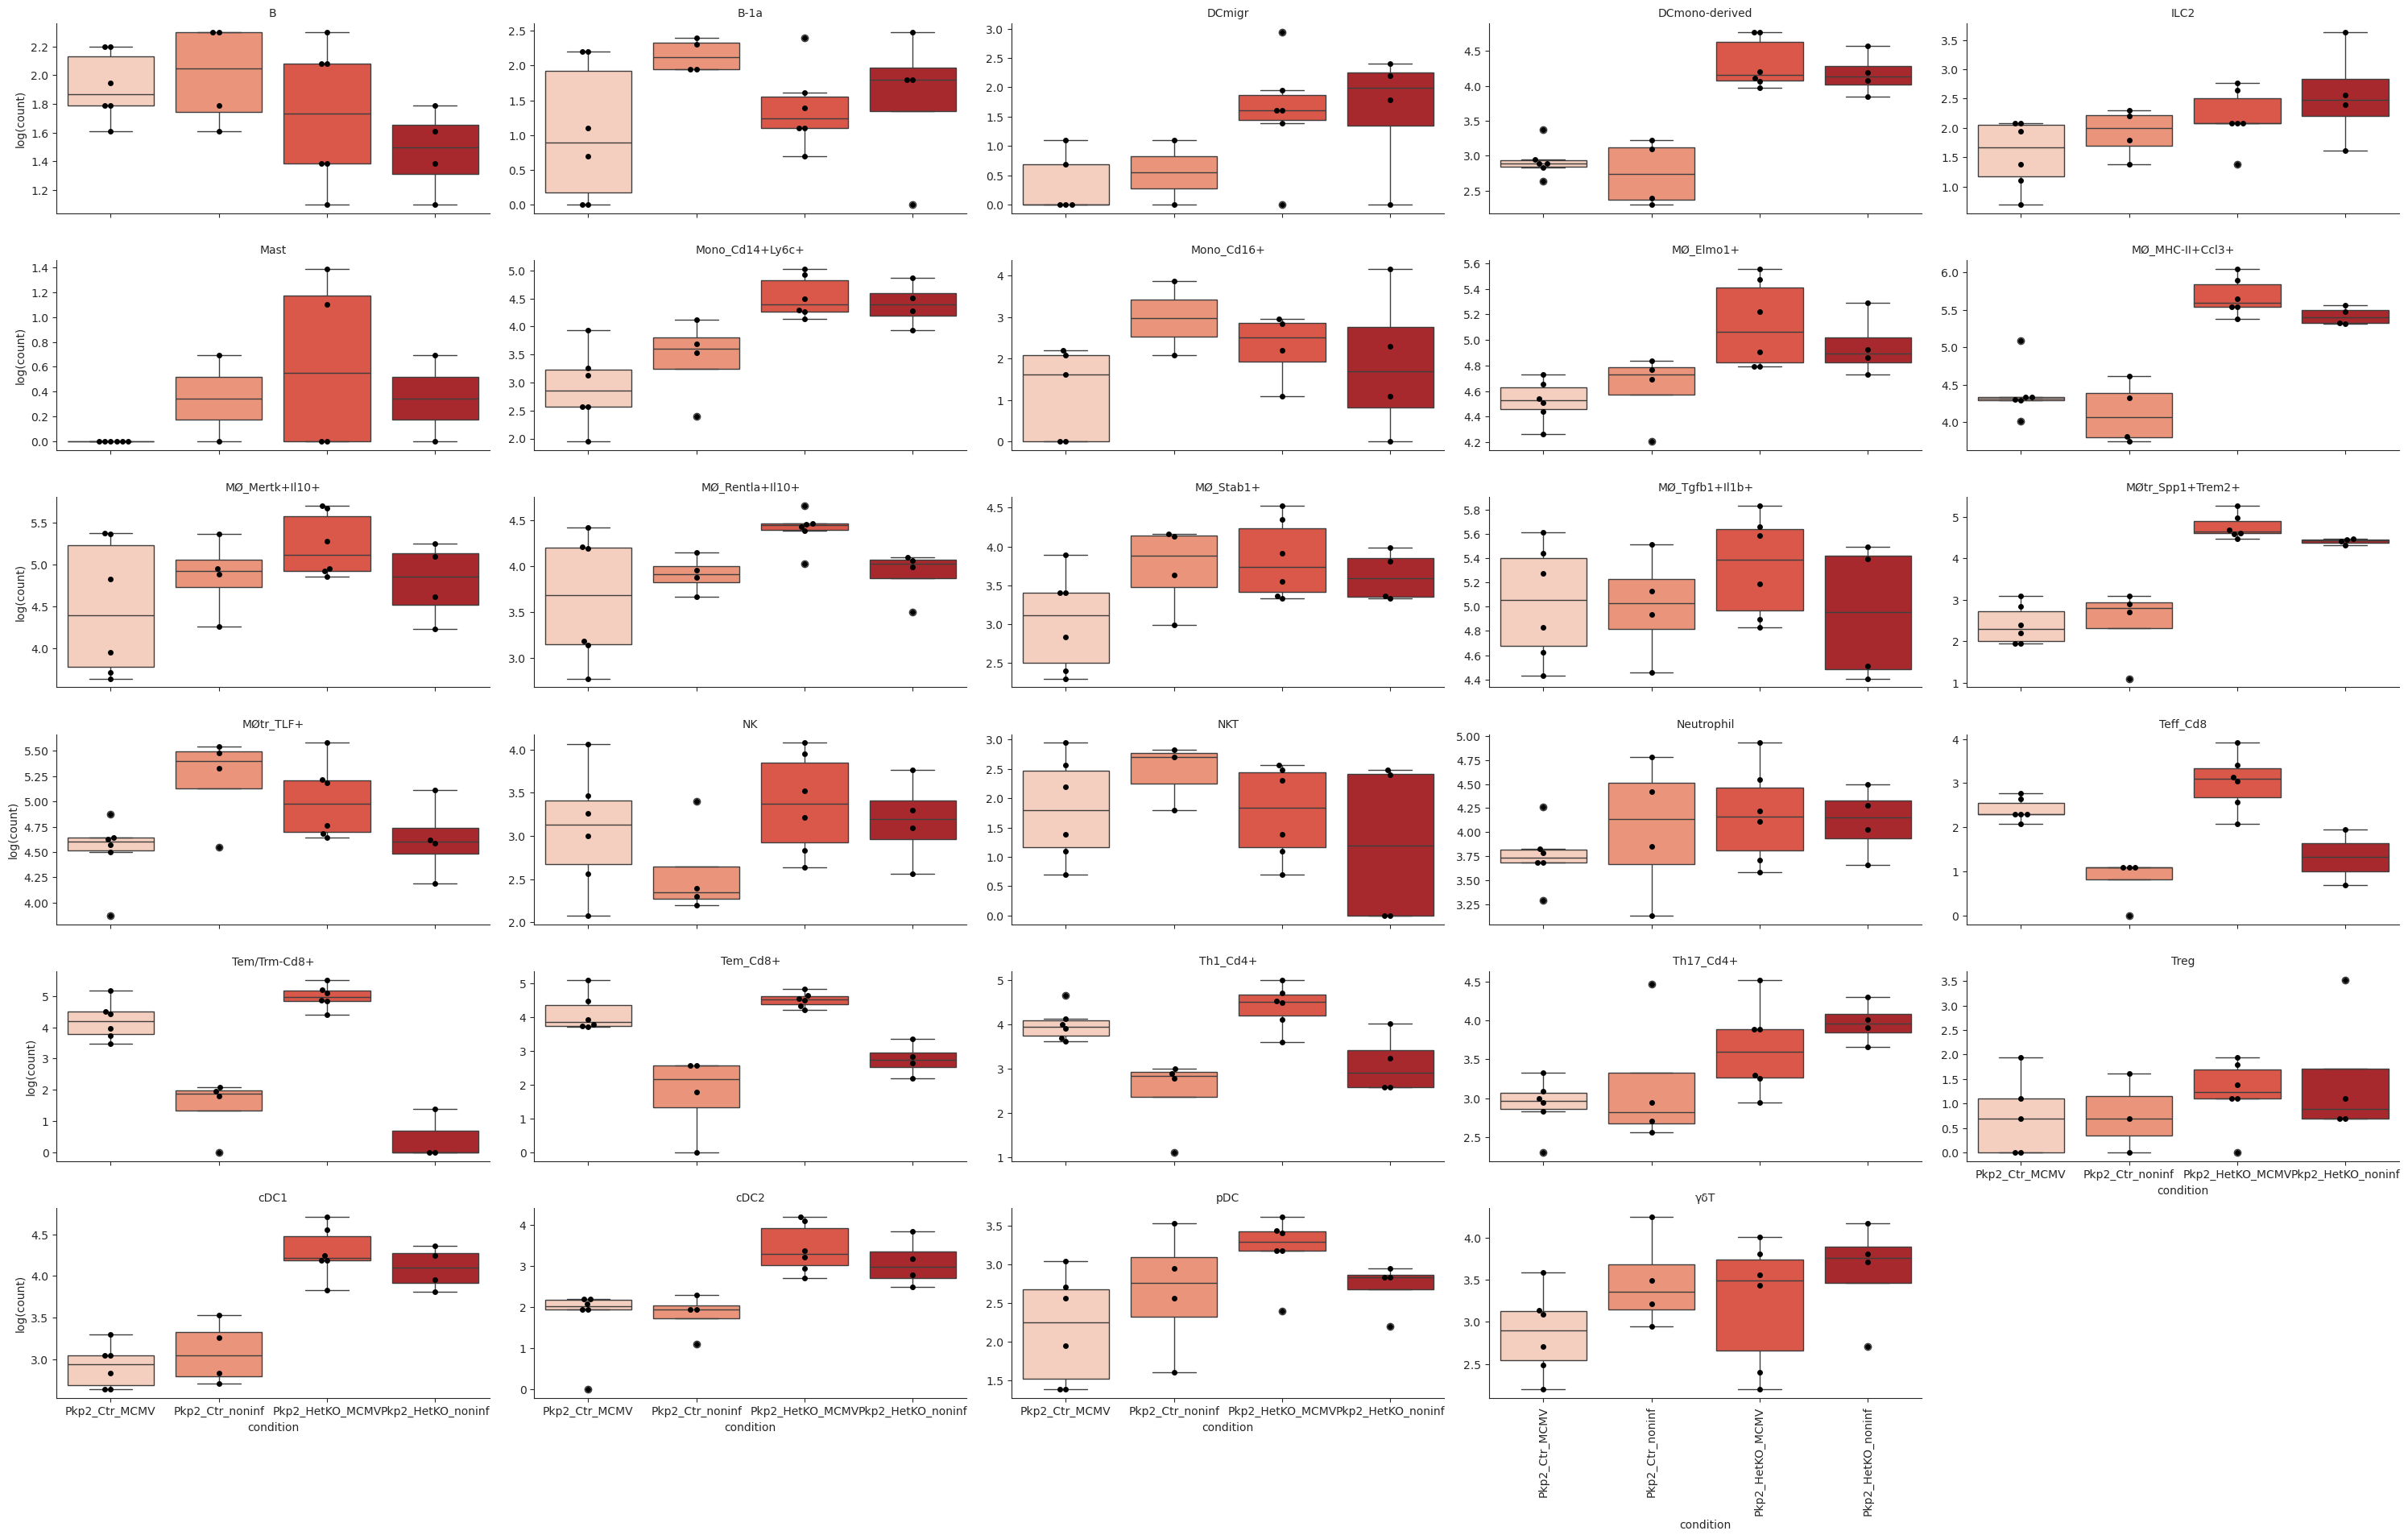

In [57]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="condition",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_condition_Pkp2_single_barplots.png", format='png')
plt.show()

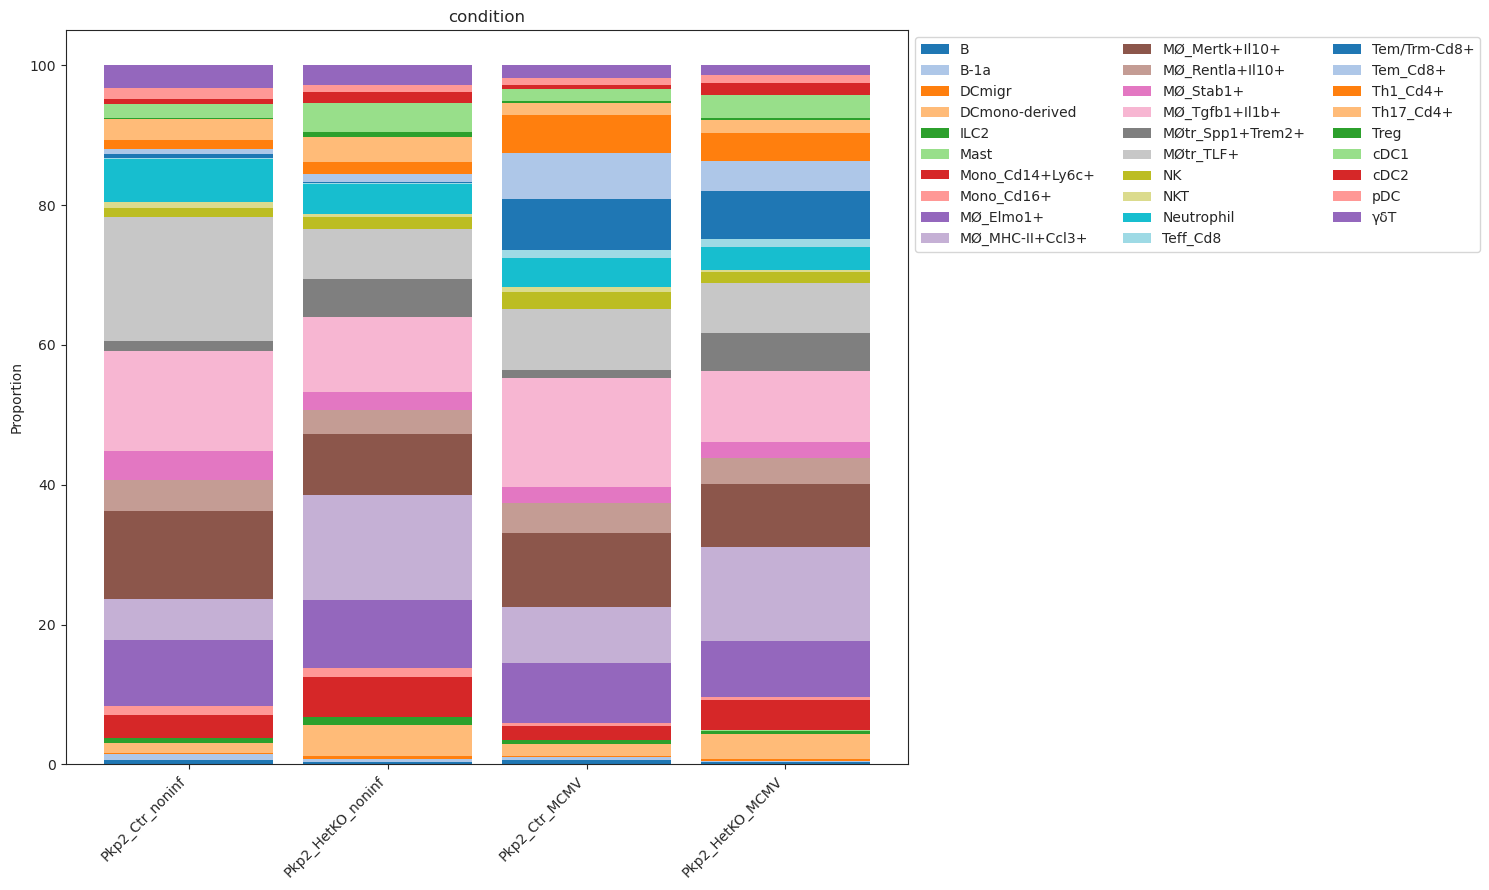

In [58]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="condition", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [59]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="condition",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to pDC

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 20 × 29
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [60]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

sample: 100%|██████████| 11000/11000 [05:47<00:00, 31.62it/s, 511 steps of size 6.73e-03. acc. prob=0.96] 


Acceptance rate unusually high (0.964891478904883 > 0.95)! Results might be incorrect! Please check feasibility of 
results and re-run the sampling step with a different rng_key if necessary.

In [61]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 20 × 29
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_condition[T.Pkp2_HetKO_noninf]', 'effect_df_condition[T.Pkp2_Ctr_MCMV]', 'effect_df_condition[T.Pkp2_HetKO_MCMV]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [62]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 20 samples, 29 cell types                                    │
│ Reference cell type                        │ pDC                                                                │
│ Formula                                    │ condition                                                          │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                   Final Parameter  Expected Sample                                                              │
│ Cell Type                                                                                                       │
│ B                      0.404           10.743                                                                   │
│ B-1a                   0.251            9.219                                                                   │
│ DCmigr                -0.253            5.569                                                                   │
│ DCmono-derived         1.501           32.177                                                                   │
│ ILC2                   0.556           12.506                                                                   │
│ Mast                  -0.686            3.612                                                                   │
│ Mono_Cd14+Ly6c+        1.963           51.072                                                                   │
│ Mono_Cd16+             0.145            8.292                                                                   │
│ MØ_Elmo1+              3.076          155.438                                                                   │
│ MØ_MHC-II+Ccl3+        2.680          104.611                                                                   │
│ MØ_Mertk+Il10+         3.176          171.785                                                                   │
│ MØ_Rentla+Il10+        2.300           71.539                                                                   │
│ MØ_Stab1+              1.907           48.291                                                                   │
│ MØ_Tgfb1+Il1b+         3.374          209.400                                                                   │
│ MØtr_Spp1+Trem2+       1.239           24.760                                                                   │
│ MØtr_TLF+              3.590          259.886                                                                   │
│ NK                     1.387           28.710                                                                   │
│ NKT                    0.352           10.199                                                                   │
│ Neutrophil             2.339           74.384                                                                   │
│ Teff_Cd8              -0.000            7.172                                                                   │
│ Tem/Trm-Cd8+           0.491           11.719                                                                   │
│ Tem_Cd8+               0.905           17.730                                                                   │
│ Th1_Cd4+               1.249           25.009                                                                   │
│ Th17_Cd4+              1.692           38.949                                                                   │
│ Treg                  -0.196            5.896                                                                   │
│ cDC1                   1.684           38.638                                                                   │
│ cDC2                   0.803           16.011                                                                   │
│ pDC                    1.119           21.960                                                                   │
│ γδT                    1.699           39.222                                                                   │
└───────────────────────────────────────────────────────

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                Final Parameter  Expected Sample  log2-fold change               │
│ Covariate                    Cell Type                                                                          │
│ conditionT.Pkp2_HetKO_noninf B                      0.000            9.730            -0.143                    │
│                              B-1a                   0.000            8.350            -0.143                    │
│                              DCmigr                 0.000            5.044            -0.143                    │
│                              DCmono-derived         0.770           62.964             0.969                    │
│                              ILC2                   0.000           11.327            -0.143                    │
│                              Mast                   0.000            3.271            -0.143                    │
│                              Mono_Cd14+Ly6c+        0.615           85.520             0.744                    │
│                              Mono_Cd16+             0.000            7.510            -0.143                    │
│                              MØ_Elmo1+              0.000          140.783            -0.143                    │
│                              MØ_MHC-II+Ccl3+        0.841          219.651             1.070                    │
│                              MØ_Mertk+Il10+         0.000          155.589            -0.143                    │
│                              MØ_Rentla+Il10+        0.000           64.794            -0.143                    │
│                              MØ_Stab1+              0.000           43.738            -0.143                    │
│                              MØ_Tgfb1+Il1b+         0.000          189.657            -0.143                    │
│                              MØtr_Spp1+Trem2+       1.233           76.931             1.636                    │
│                              MØtr_TLF+             -0.800          105.792            -1.297                    │
│                              NK                     0.000           26.003            -0.143                    │
│                              NKT                    0.000            9.237            -0.143                    │
│                              Neutrophil             0.000           67.371            -0.143                    │
│                              Teff_Cd8               0.000            6.496            -0.143                    │
│                              Tem/Trm-Cd8+          -0.853            4.525            -1.373                    │
│                              Tem_Cd8+               0.000           16.058            -0.143                    │
│                              Th1_Cd4+               0.000           22.651            -0.143                    │
│                              Th17_Cd4+              0.000           35.277            -0.143                    │
│                              Treg                   0.000            5.340            -0.143                    │
│                              cDC1                   0.555           60.973             0.658                    │
│                              cDC2                   0.000           14.501            -0.143                    │
│                              pDC                    0.000           19.890            -0.143                    │
│                              γδT                    0.000           35.524            -0.143                    │
│ conditionT.Pkp2_Ctr_MCMV     B                      0.

### Filter out credible effects

In [63]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate                       Cell Type     
condition[T.Pkp2_HetKO_noninf]  B                 False
                                B-1a              False
                                DCmigr            False
                                DCmono-derived     True
                                ILC2              False
                                                  ...  
condition[T.Pkp2_HetKO_MCMV]    Treg              False
                                cDC1               True
                                cDC2               True
                                pDC               False
                                γδT               False
Name: Final Parameter, Length: 87, dtype: bool

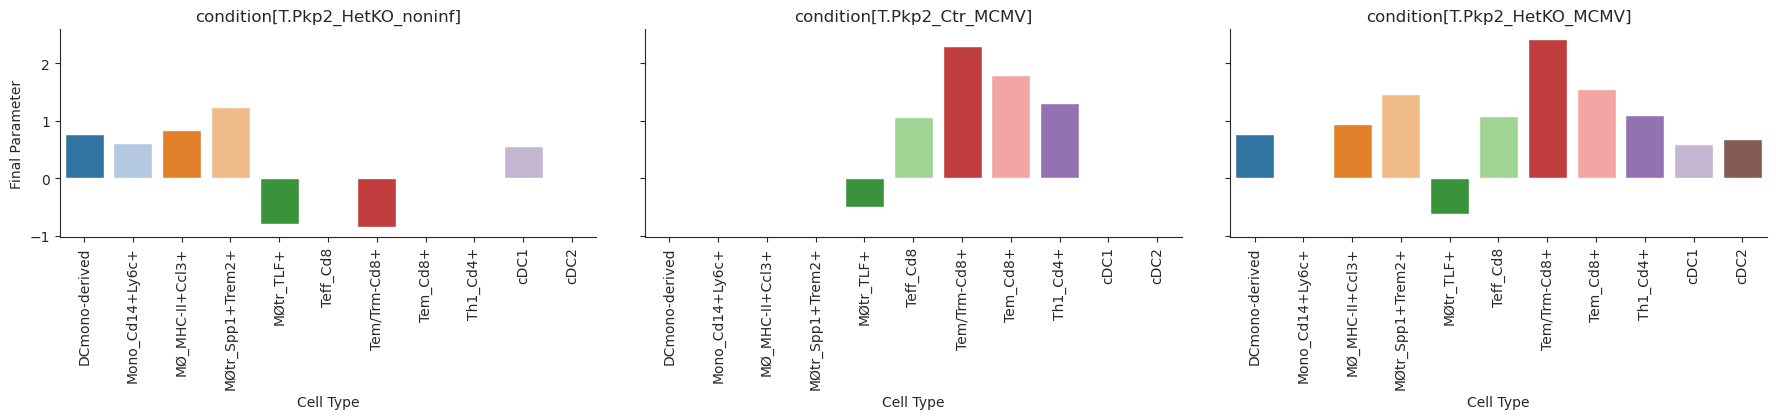

In [64]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

##### Adjust the "false discovery rate"

In [65]:
sccoda_data

MuData object with n_obs × n_vars = 30300 × 29407
  2 modalities
    rna:	30280 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    coda:	20 x 29
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_condition[T.Pkp2_HetKO_noninf]', 'effect_df_condition[T.Pkp2_Ctr_MCMV]', 'effect_df_condition[T.Pkp2_HetKO_MCMV]'

In [66]:
sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_noninf]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B,0.000000,-1.038,0.362,0.306,0.4910,9.730053,-0.142864
B-1a,0.000000,-0.864,0.586,0.267,0.4462,8.349648,-0.142864
DCmigr,0.000000,-0.482,1.109,0.337,0.5146,5.044101,-0.142864
DCmono-derived,0.770351,0.260,1.266,0.296,0.9633,62.964444,0.968518
ILC2,0.000000,-0.430,0.857,0.268,0.4774,11.327341,-0.142864
Mast,0.000000,-1.007,0.602,0.290,0.4581,3.271404,-0.142864
Mono_Cd14+Ly6c+,0.614531,-0.006,1.066,0.349,0.8348,85.519978,0.743717
Mono_Cd16+,0.000000,-0.507,0.961,0.286,0.4680,7.509879,-0.142864
MØ_Elmo1+,0.000000,-0.328,0.246,0.081,0.2723,140.782957,-0.142864


In [67]:
sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_MCMV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B,0.000000,-1.113,0.289,0.301,0.4228,8.231525,-0.384152
B-1a,0.000000,-1.167,0.322,0.334,0.4432,7.063716,-0.384152
DCmigr,0.000000,-0.450,1.149,0.307,0.4129,4.267257,-0.384152
DCmono-derived,0.778928,0.305,1.240,0.256,0.9827,53.726115,0.739604
ILC2,0.000000,-0.804,0.458,0.211,0.3446,9.582814,-0.384152
Mast,0.000000,-0.980,0.733,0.270,0.3737,2.767574,-0.384152
Mono_Cd14+Ly6c+,0.000000,-0.003,0.998,0.334,0.8068,39.133203,-0.384152
Mono_Cd16+,0.000000,-1.025,0.507,0.282,0.3947,6.353280,-0.384152
MØ_Elmo1+,0.000000,-0.231,0.257,0.057,0.1967,119.100930,-0.384152


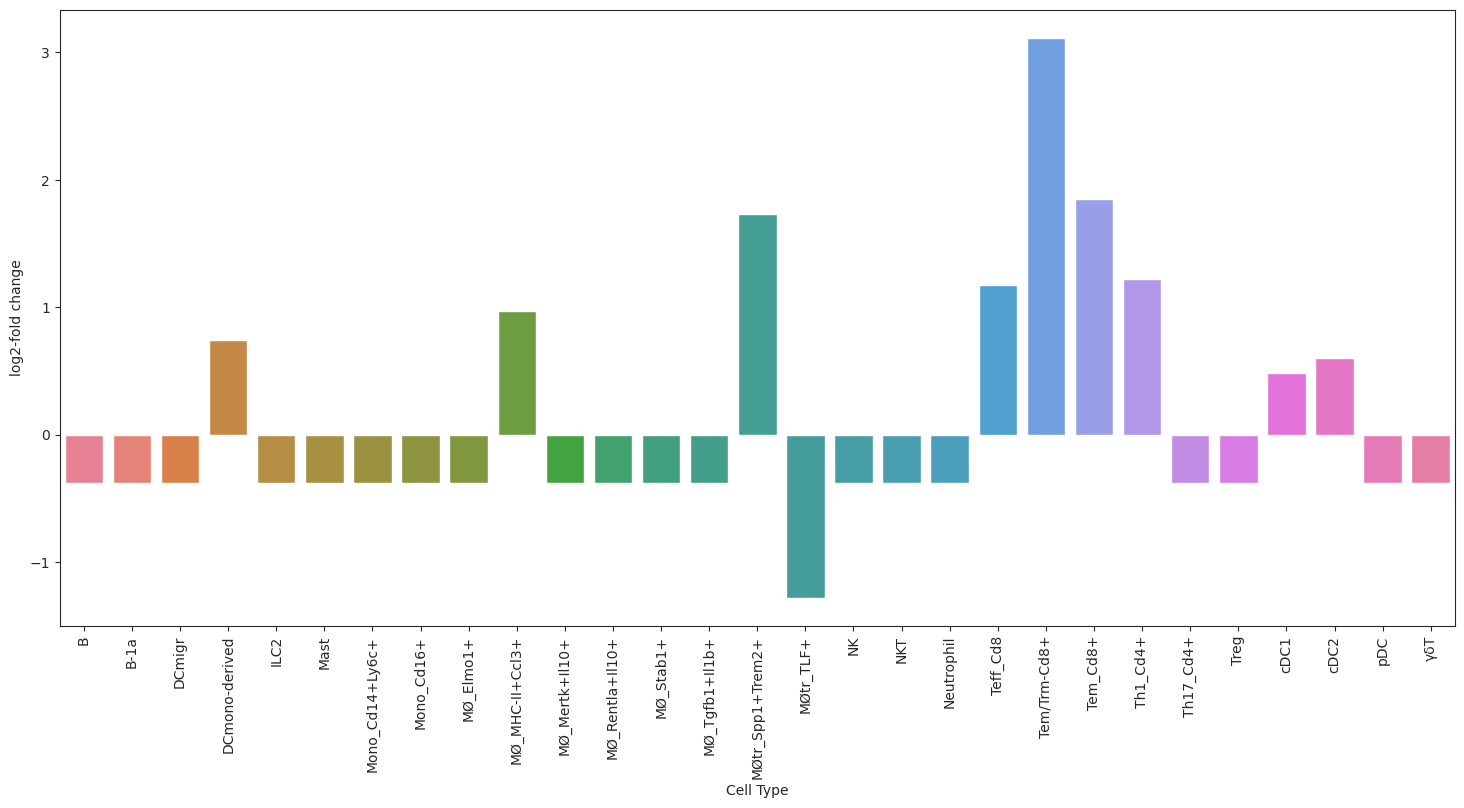

In [68]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_MCMV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_condition_Pkp2_hetkoMCMV.png", format='png')
plt.show()

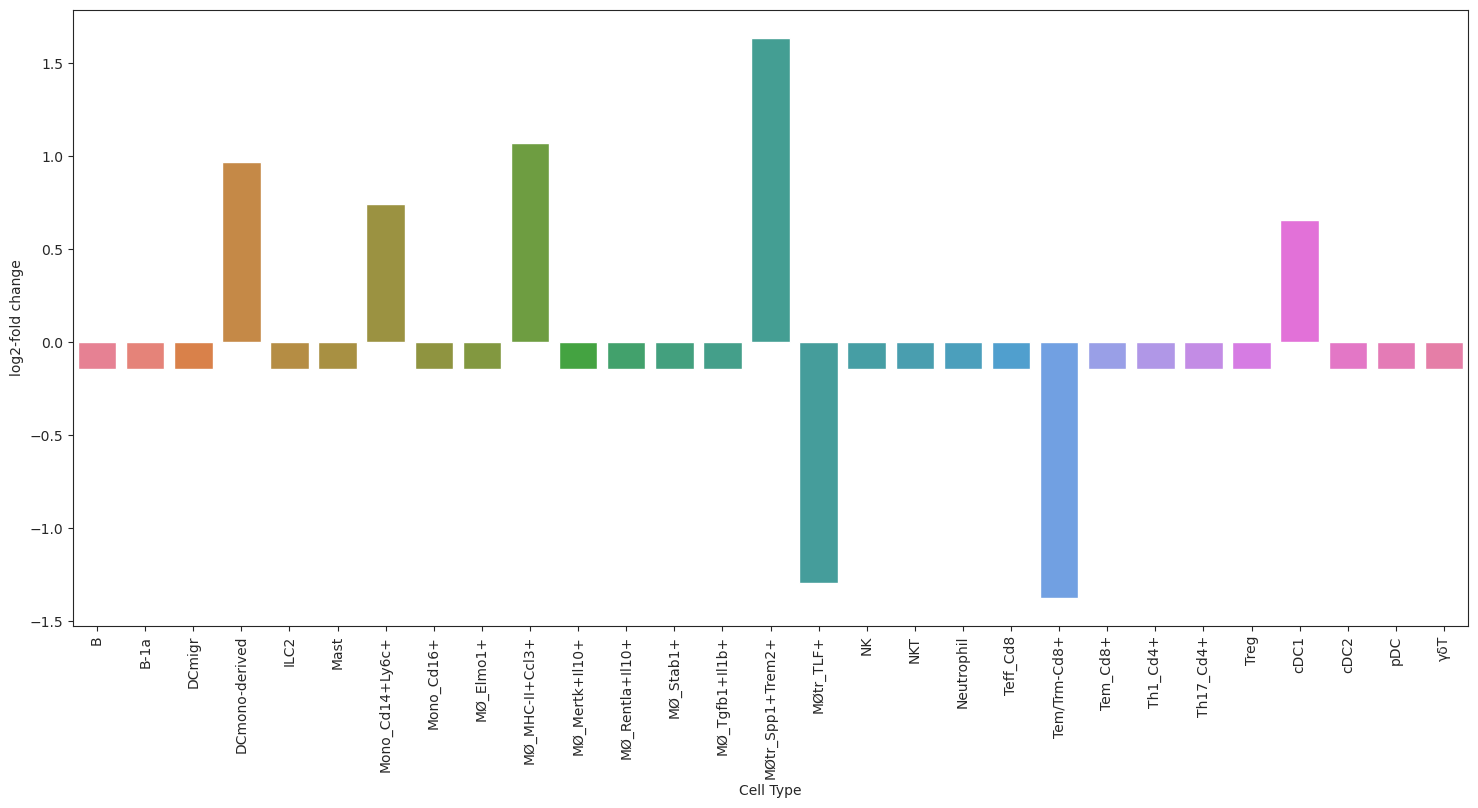

In [69]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_condition[T.Pkp2_HetKO_noninf]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_condition_Pkp2_hetko-noninf.png", format='png')
plt.show()

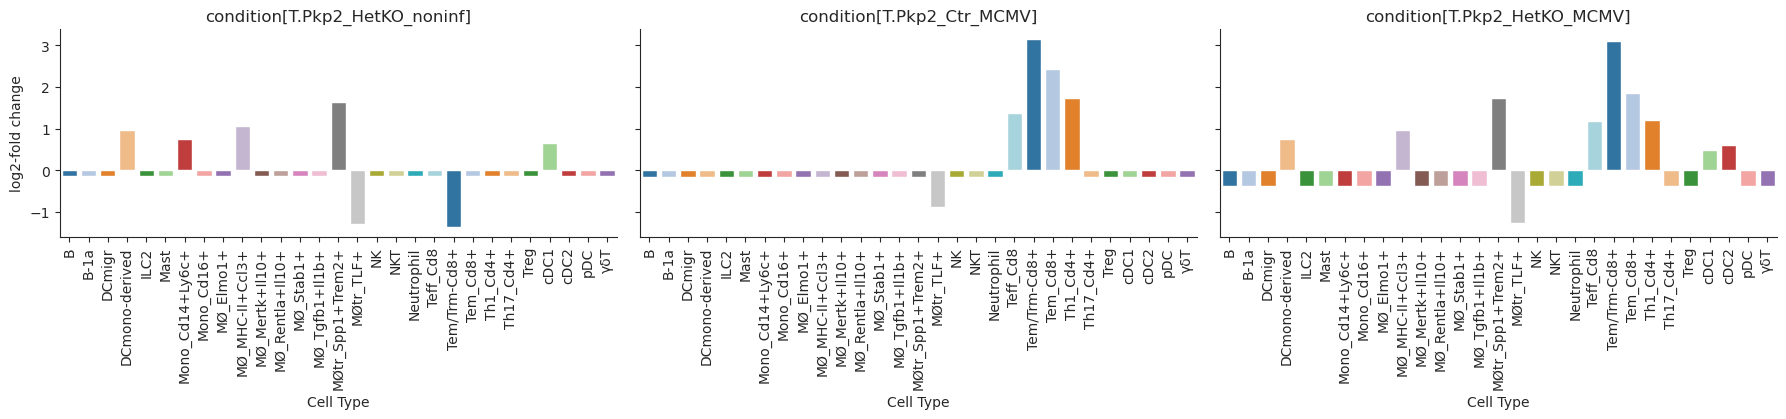

In [70]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "condition")
plt.show()